In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt

In [3]:
def getTissuePositions(inputName,gridSize,dX,dY):
    
    NoOfTissues = 1
    NoOfTissuesBottom = 0
    
    #--------------------------------------------------
    # generate grids
    #--------------------------------------------------
    grid = []
    for x in range(-gridSize, gridSize+1):
        for y in range(-gridSize, gridSize+1):
            if x % 2 == 0:
                grid.append((x*200, y*200))
            else:
                grid.append((x*200, -y*200))

    grid_R =  grid[::-1]
    grid = np.array(grid)
    grid_R = np.array(grid_R)
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    points = pd.read_csv(inputName, header = None, sep=',')
    print(inputName + ' read!')
    print(str(points.shape[0]) + ' points found.')
    
#     if len(inputNames) > 1:
#         pointsList = []
#         for i in range(len(inputNames)):
#             pointsList.append(pd.read_csv(inputNames[i], header = None, sep=','))
#         points = pd.concat(pointsList)
#     else:
        
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    
    n = points.shape[0] #number of positions you selected for each slice to define the region of interest

    positions = np.empty((0,2))
    for i in range(0,NoOfTissuesBottom):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid_R + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))

    for i in range(NoOfTissuesBottom,NoOfTissues):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))
        
    # add displacement between 10x and 60x objectives
    positions = positions + [dX,dY]
    print(str(positions.shape[0]) + ' positions generated.')
    
    return positions
    

# Shared variables

In [4]:
gridSize = 50
notebookFolder = 'c:/Users/Leonardo/Dropbox/research/analysis/BreastCancer/notebook/210327_BC115_MERFISH/'
positionsFolder = 'c:/Software/merfish-parameters/positions/'
imagingSettingsFolder = 'c:/Software/imaging-settings/210327_BC115/' 
experimentName = 'BC115'

# Displacement of 60X objective respect to 10X


In [9]:
objDisp = {'MERFISH3':[-259.6,  18.4], 
           'MERFISH8':[-352.2, -22.2]} # [dX, dY]

# sample 01 (MERFISH3)

In [6]:
sample = 1

# create grid for each section
positionsList = []
for ii in range(2):
    inputName = f'{imagingSettingsFolder}sample_0{sample}/boundary_positions_{ii}.txt'
    pos = getTissuePositions(inputName, gridSize, objDisp['MERFISH3'][0],  objDisp['MERFISH3'][0])
    positionsList.append(pos)
    
    # save intermediateddata to image settings folder
    outputName = f'{imagingSettingsFolder}sample_0{sample}/bulk_positions_{ii}.txt'
    np.savetxt(outputName, pos, delimiter=',')
    print(f'{outputName} saved!\n')
    
    
# concatenate positions in single file
positions = np.concatenate(positionsList)

# save to image settings folder
outputName = f'positions_{experimentName}_sample_0{sample}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'saving {outputPath}')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'saving {outputPath}')

c:/Software/imaging-settings/210327_BC115/sample_01/boundary_positions_0.txt read!
87 points found.
301 positions generated.
c:/Software/imaging-settings/210327_BC115/sample_01/bulk_positions_0.txt saved!

c:/Software/imaging-settings/210327_BC115/sample_01/boundary_positions_1.txt read!
167 points found.
911 positions generated.
c:/Software/imaging-settings/210327_BC115/sample_01/bulk_positions_1.txt saved!

saving c:/Software/imaging-settings/210327_BC115/sample_01/positions_BC115_sample_01.txt
saving c:/Software/merfish-parameters/positions/positions_BC115_sample_01.txt


<IPython.core.display.Javascript object>


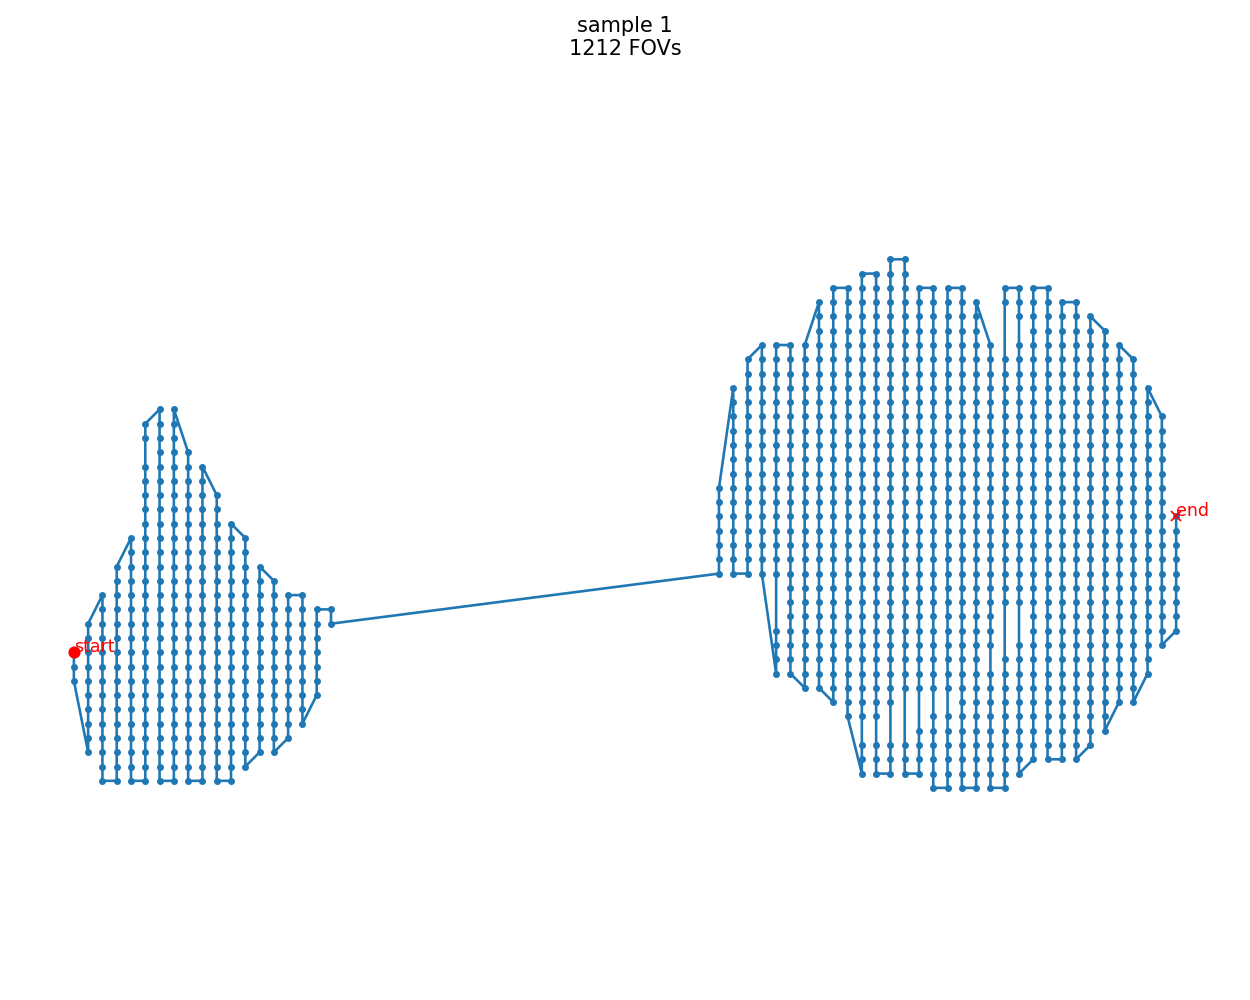

In [7]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputPath, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.text(positions.X.iloc[0],positions.Y.iloc[0],'start',c='r')

ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
ax.text(positions.X.iloc[-1],positions.Y.iloc[-1],'end',c='r')

ax.set_title(f'sample {sample}\n{positions.shape[0]} FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

# sample 2 (MERFISH8)

In [10]:
sample = 2

# create grid for each section
positionsList = []
for ii in range(2):
    inputName = f'{imagingSettingsFolder}sample_0{sample}/boundary_positions_{ii}.txt'
    pos = getTissuePositions(inputName, gridSize, objDisp['MERFISH8'][0],  objDisp['MERFISH8'][0])
    positionsList.append(pos)
    
    # save intermediateddata to image settings folder
    outputName = f'{imagingSettingsFolder}sample_0{sample}/bulk_positions_{ii}.txt'
    np.savetxt(outputName, pos, delimiter=',')
    print(f'{outputName} saved!\n')
    
    
# concatenate positions in single file
positions = np.concatenate(positionsList)

# save to image settings folder
outputName = f'positions_{experimentName}_sample_0{sample}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'saving {outputPath}')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'saving {outputPath}')

c:/Software/imaging-settings/210327_BC115/sample_02/boundary_positions_0.txt read!
70 points found.
390 positions generated.
c:/Software/imaging-settings/210327_BC115/sample_02/bulk_positions_0.txt saved!

c:/Software/imaging-settings/210327_BC115/sample_02/boundary_positions_1.txt read!
221 points found.
909 positions generated.
c:/Software/imaging-settings/210327_BC115/sample_02/bulk_positions_1.txt saved!

saving c:/Software/imaging-settings/210327_BC115/sample_02/positions_BC115_sample_02.txt
saving c:/Software/merfish-parameters/positions/positions_BC115_sample_02.txt


<IPython.core.display.Javascript object>


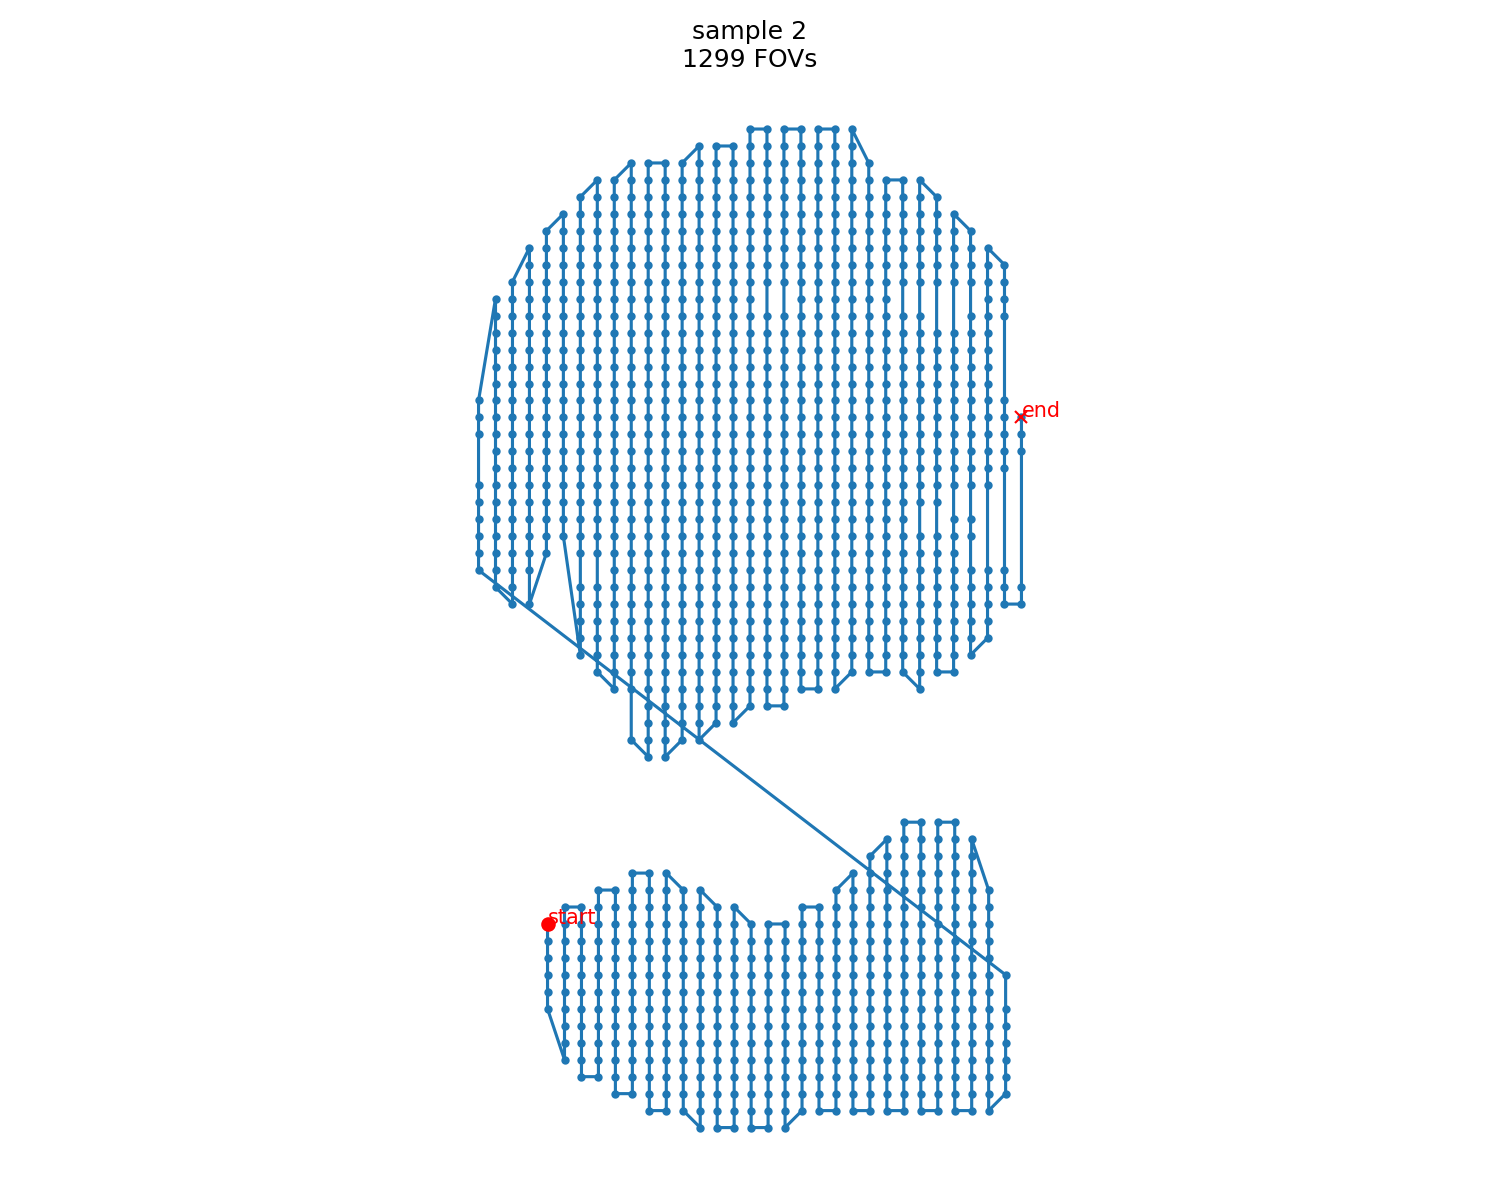

In [11]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputPath, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.text(positions.X.iloc[0],positions.Y.iloc[0],'start',c='r')

ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
ax.text(positions.X.iloc[-1],positions.Y.iloc[-1],'end',c='r')

ax.set_title(f'sample {sample}\n{positions.shape[0]} FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    